# PV - Task 1 - Dashboard

In [6]:
import pandas as pd
import numpy as np
import altair as alt
from altair import datum
#import datetime
#import pickle

import sys
sys.path.append("../library/")
from load_data import *
%load_ext autoreload
%autoreload 2

PATH_DATA = '../data/'
# to enable Altair in the classic notebook
alt.renderers.enable('notebook')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


RendererRegistry.enable('notebook')

## Graph 2:  Quantity per year and per macrofamily

In [7]:
df = load_df(PATH_DATA)

In [8]:
year_family_quantity = df.groupby(['Any', 'NomMacrofamilia'], as_index=False).agg({"Quantitat": "sum", "Quantitat_norm":"sum"})
year_family_quantity.Any = pd.to_datetime(year_family_quantity.Any, format='%Y')

In [29]:
# nearest = alt.selection(type='single', nearest=True, on='mouseover',
#                         fields=['Any'], empty='none')
# 
# line = alt.Chart().mark_line().encode(
#     x='Any:T',
#     y='Quantitat:Q',
#     color=alt.Color('NomMacrofamilia', legend=alt.Legend(title="Macrofamilia")),
#     tooltip = ['NomMacrofamilia', 'Quantitat', 'Quantitat_norm'])
# 
# selectors = alt.Chart().mark_point().encode(
#     x='Any:T',
#     opacity=alt.value(0),
# ).add_selection(
#     nearest)
# 
# points = line.mark_point().encode(
#     opacity=alt.condition(nearest, alt.value(1), alt.value(0)))
# 
# text = line.mark_text(align='left', dx=5, dy=-5).encode(
#     text=alt.condition(nearest, 'Quantitat', alt.value('')))
# 
# rules = alt.Chart().mark_rule(color='gray').encode(
#     x='Any:T',
# ).transform_filter(
#     nearest)
# 
# graph_quant_fam = alt.layer(line, selectors, points, rules, text,
#           data=year_family_quantity, width=600, height=300).configure_axis(
#     grid=False
# ).configure_view(
#    strokeOpacity=0)
# 
# graph_quant_fam.save('graph_quant_fam.json')
# graph_quant_fam

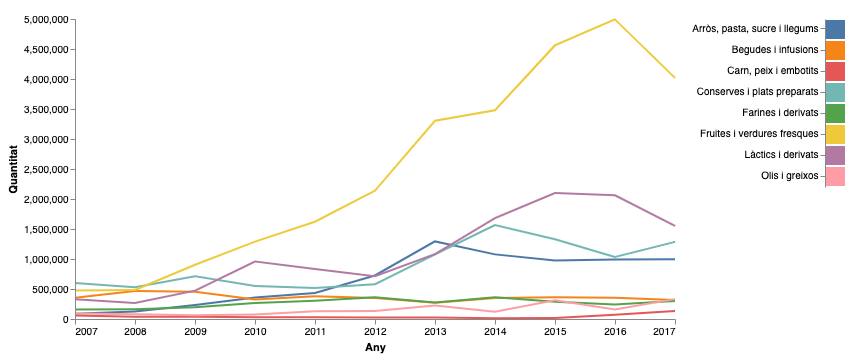

In [40]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Any'], empty='none')

click = alt.selection_multi(encodings=['color'])


line = alt.Chart().mark_line().encode(
    x=alt.X('Any:T'),
    y=alt.Y('Quantitat:Q', scale=alt.Scale(domain=(0,5000000))),
    color=alt.Color('NomMacrofamilia', legend=None),
    tooltip = ['NomMacrofamilia', 'Quantitat', 'Quantitat_norm']
).transform_filter(click)

selectors = alt.Chart().mark_point().encode(
    x='Any:T',
    opacity=alt.value(0),
).add_selection(
    nearest)

points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='right', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Quantitat', alt.value('')))

rules = alt.Chart().mark_rule(color='gray').encode(
    x='Any:T',
).transform_filter(
    nearest)

graph_quant_fam = alt.layer(line, selectors, points, rules, text,
          data=year_family_quantity, width=600, height=300
)



trickSelection = alt.Chart(year_family_quantity,title="").mark_bar().encode(    # we are faking the selection with a bar chart
    x=alt.X('LegendWidth:Q',axis=None),
    y=alt.Y('NomMacrofamilia',title=None),
    color=alt.Color('NomMacrofamilia:N',legend=None)                    # we avoid legend or axis titles not making sense  
).transform_calculate(
    LegendWidth="datum.Quantitat * 0 + 1"               # we create a new column with '1' values 
).properties(
    selection=click
).properties(width=20)




graph_quant_fam_selection = (graph_quant_fam | trickSelection).configure_axis(grid=False).configure_view(strokeOpacity=0)
graph_quant_fam_selection.save('graph_quant_fam.json')
graph_quant_fam_selection
